In [1]:
import pandas as pd

In [2]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [3]:
cn7 = pd.read_csv("./cn7_resampled.csv")

In [4]:
from sklearn.model_selection import train_test_split
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

test_data = pd.read_csv("./cn7_test.csv")
y_test = test_data["PassOrFail"]
X_test = test_data.drop(columns=["PassOrFail"])

In [5]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# ss.fit(X_train)
# X_train_scaled = ss.transform(X_train)
# X_val_scaled = ss.transform(X_val)
# X_test_scaled=ss.transform(X_test)

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# # 모델 생성
# rf = RandomForestClassifier(random_state=42)
# et = ExtraTreesClassifier(random_state=42)
# gb = GradientBoostingClassifier(random_state=42)
# hgb = HistGradientBoostingClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)
# model_list = [rf, et, gb, hgb, xgb]

# grid_df = pd.DataFrame()

# # GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
# for model in model_list:
#     model_name = model.__class__.__name__
#     gridParams = dict()
#     if model_name =="XGBClassifier" :
#         gridParams["n_estimators"] = [20,50]
#         gridParams["max_depth"] = [10,20]
#         gridParams["min_child_weight"] = [1, 2,4]
#     elif model_name == "HistGradientBoostingClassifier" :
#         gridParams["max_iter"] = [20, 50]
#         gridParams["max_depth"] = [10, 50]
#         gridParams["min_samples_leaf"] = [1,2,4]
#     else :
#         gridParams["n_estimators"] = [20, 50]
#         gridParams["max_depth"] = [10,20]
#         gridParams["min_samples_split"] = [2,5,10]
#         gridParams["min_samples_leaf"] = [1,2,4]

#     grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
#     grid_search_model.fit(X_train_scaled, y_train)
#     model = grid_search_model.best_estimator_
#     train_pred = model.predict(X_train_scaled)
#     val_pred = model.predict(X_val_scaled)
    
#     train_acc = accuracy_score(y_train, train_pred)
#     val_acc = accuracy_score(y_val, val_pred)
    
#     pre = precision_score(y_val, val_pred)
#     rec = recall_score(y_val, val_pred)
#     f1 = f1_score(y_val, val_pred)
    
#     pred = model.predict(X_test_scaled)
#     cm = confusion_matrix(y_test, pred)
#     TN = cm[0, 0]  # True Negative
#     FP = cm[0, 1]  # False Positive
#     FN = cm[1, 0]  # False Negative
#     TP = cm[1, 1]  # True Positive
    
#     df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, TN, FP, FN, TP, str(grid_search_model.best_params_)]],
#                              columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "TN", "FP", "FN", "TP", "파라미터"])

#     grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
# grid_df

In [6]:
from scipy.stats import spearmanr, pearsonr
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])
for col_name in X.columns:
    print(col_name)
    print("피어슨")
    print(pearsonr(X[col_name], y))
    print("스피어만")
    print(spearmanr(X[col_name], y))
    print("==================================================================")

Injection_Time
피어슨
PearsonRResult(statistic=0.3973768786237092, pvalue=3.657470066414128e-126)
스피어만
SignificanceResult(statistic=0.23063949894561378, pvalue=2.2134072967540589e-41)
Filling_Time
피어슨
PearsonRResult(statistic=0.3974964042491591, pvalue=3.0315124502757e-126)
스피어만
SignificanceResult(statistic=0.22828458171641663, pvalue=1.4872947872659528e-40)
Plasticizing_Time
피어슨
PearsonRResult(statistic=-0.39523293123853376, pvalue=1.0465068500475921e-124)
스피어만
SignificanceResult(statistic=-0.29345739917002256, pvalue=5.1449101599946426e-67)
Cycle_Time
피어슨
PearsonRResult(statistic=0.38008336203235726, pvalue=1.0206904959324136e-114)
스피어만
SignificanceResult(statistic=0.08193791055724713, pvalue=2.2425637786800358e-06)
Clamp_Close_Time
피어슨
PearsonRResult(statistic=0.5019963897372182, pvalue=9.779398114809177e-212)
스피어만
SignificanceResult(statistic=0.656109848354027, pvalue=0.0)
Cushion_Position
피어슨
PearsonRResult(statistic=0.01593505398059416, pvalue=0.35839137600267884)
스피어만
SignificanceR

C:\Users\Admin\AppData\Local\Temp\ipykernel_22888\2969300833.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(pearsonr(X[col_name], y))
C:\Users\Admin\AppData\Local\Temp\ipykernel_22888\2969300833.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(spearmanr(X[col_name], y))


In [7]:
cn7 =cn7.drop(columns=["Clamp_Open_Position"])

Accuracy: 1.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_22888\189831095.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


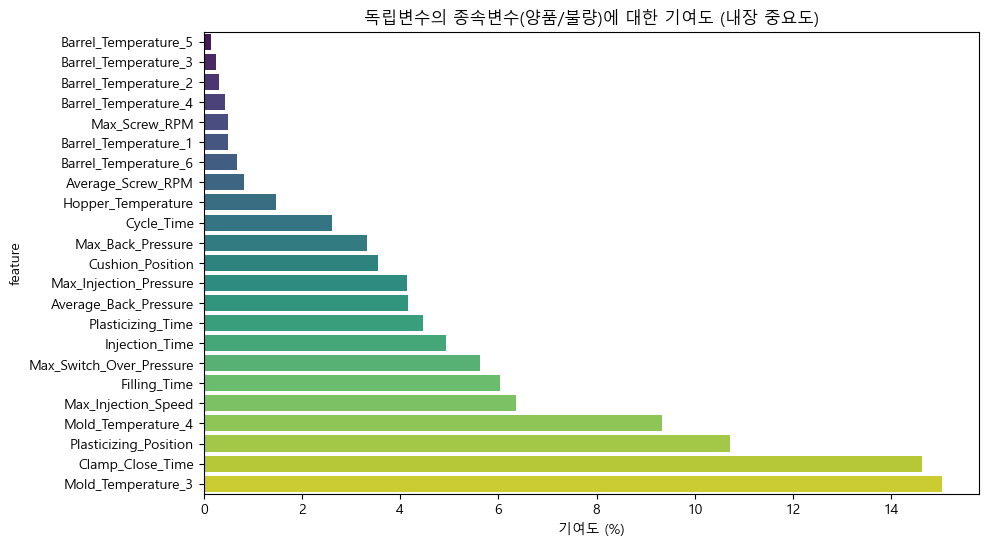

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 준비 (cn7 데이터프레임 사용)
X = cn7.drop('PassOrFail', axis=1)
y = cn7['PassOrFail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 성능 확인
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 내장 feature importance 계산(백분율로)
importances = model.feature_importances_ * 100
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feature_importances.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.xlabel('기여도 (%)')
plt.title('독립변수의 종속변수(양품/불량)에 대한 기여도 (내장 중요도)')
plt.show()


In [11]:
import shap
import matplotlib.pyplot as plt

# compute SHAP values
explainer = shap.Explainer(model, X, feature_perturbation="interventional")
shap_values = explainer(X, check_additivity=False)



100%|===================| 6615/6648 [00:34<00:00]        

In [14]:
shap_values.values 

array([[[ 0.04305575, -0.04305575],
        [ 0.04046479, -0.04046478],
        [ 0.0325486 , -0.0325486 ],
        ...,
        [-0.00216499,  0.00216499],
        [ 0.06024574, -0.06024574],
        [ 0.08185035, -0.08185035]],

       [[ 0.02913796, -0.02913796],
        [ 0.02986016, -0.02986016],
        [ 0.00862103, -0.00862103],
        ...,
        [ 0.01241027, -0.01241027],
        [ 0.04289934, -0.04289934],
        [ 0.03313168, -0.03313168]],

       [[ 0.02187726, -0.02187726],
        [ 0.0335718 , -0.0335718 ],
        [ 0.03233033, -0.03233033],
        ...,
        [ 0.00073683, -0.00073683],
        [ 0.04305817, -0.04305817],
        [ 0.03944462, -0.03944462]],

       ...,

       [[ 0.00646073, -0.00646073],
        [ 0.01717546, -0.01717546],
        [-0.01308321,  0.01308321],
        ...,
        [-0.01756043,  0.01756043],
        [-0.07603552,  0.07603553],
        [-0.05877677,  0.05877677]],

       [[-0.02660851,  0.02660851],
        [-0.0399725 ,  0.03

In [ ]:
import shap
import numpy as np

# SHAP explainer 생성: tree 기반 모델이라면 TreeExplainer 사용
explainer = shap.TreeExplainer(model)
# RandomForest의 경우 다중 클래스에 대해 shap_values 반환 – 이진분류면 [0]과 [1] 두 클래스에 대한 값을 반환함
shap_values = explainer.shap_values(X_test)

# 일반적으로 클래스 1(양품 또는 긍정 클래스)의 값을 사용하여 전역 영향도를 확인
# 전역 feature importance: 각 변수의 절대 SHAP 값 평균을 계산
shap_importances = np.abs(shap_values[1]).mean(axis=0)
shap_imp_df = pd.DataFrame({
    'feature': X_test.columns,
    'shap_importance': shap_importances
}).sort_values(by='shap_importance', ascending=True)

# SHAP 전역 중요도 바 플롯 (바 형태)
plt.figure(figsize=(10, 6))
sns.barplot(x='shap_importance', y='feature', data=shap_imp_df, palette='viridis')
plt.xlabel('평균 절대 SHAP 값')
plt.title('SHAP을 이용한 전역 독립변수 기여도')
plt.show()

# 또는 SHAP이 제공하는 summary_plot (각 샘플의 기여도까지 시각화)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


In [ ]:
from sklearn.inspection import permutation_importance

# X_test와 y_test를 이용하여 permutation 중요도 계산 (accuracy 기준)
perm_results = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
perm_importances = perm_results.importances_mean * 100

perm_imp_df = pd.DataFrame({
    'feature': X_test.columns,
    'perm_importance': perm_importances
}).sort_values(by='perm_importance', ascending=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='perm_importance', y='feature', data=perm_imp_df, palette='viridis')
plt.xlabel('Permutation 중요도 (%)')
plt.title('Permutation을 이용한 독립변수 기여도')
plt.show()
